Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


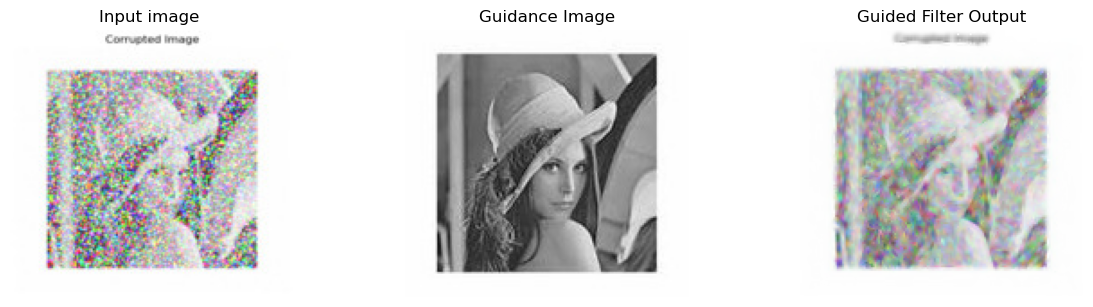

PSNR: 30.69 dB


In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def guided_filter(input, guidance, radius, epsilon):
    # Convert to float32 for precision
    input = input.astype(np.float32)
    guidance = guidance.astype(np.float32)
    

    h, w, _ = input.shape

    # Compute the mean of input and guidance images
    mean_I = np.zeros((h, w, 3), dtype=np.float32)
    mean_p = np.zeros((h, w, 3), dtype=np.float32)
    cov_Ip = np.zeros((h, w, 3), dtype=np.float32)
    var_I = np.zeros((h, w, 3), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            # Compute the neighborhood
            y1, y2, x1, x2 = max(0, i - radius), min(h, i + radius + 1), max(0, j - radius), min(w, j + radius + 1)
            neighborhood_I = guidance[y1:y2, x1:x2, :]
            neighborhood_p = input[y1:y2, x1:x2, :]

            # Calculate the mean of input and guidance in the neighborhood
            mean_I[i, j] = np.mean(neighborhood_I, axis=(0, 1))
            mean_p[i, j] = np.mean(neighborhood_p, axis=(0, 1))

            # Calculate the covariance of input and guidance in the neighborhood
            cov_Ip[i, j] = np.mean(neighborhood_I * neighborhood_p, axis=(0, 1)) - mean_I[i, j] * mean_p[i, j]

            # Calculate the variance of guidance in the neighborhood
            var_I[i, j] = np.mean(neighborhood_I * neighborhood_I, axis=(0, 1)) - mean_I[i, j] * mean_I[i, j]

    # Compute the linear coefficients 'a' and 'b'
    a = cov_Ip / (var_I + epsilon)
    b = mean_p - a * mean_I

    # Compute the mean of 'a' and 'b'
    mean_a = np.zeros((h, w, 3), dtype=np.float32)
    mean_b = np.zeros((h, w, 3), dtype=np.float32)

    for i in range(h):
        for j in range(w):
            # Compute the neighborhood
            y1, y2, x1, x2 = max(0, i - radius), min(h, i + radius + 1), max(0, j - radius), min(w, j + radius + 1)
            neighborhood_a = a[y1:y2, x1:x2, :]
            neighborhood_b = b[y1:y2, x1:x2, :]

            # Calculate the mean of 'a' and 'b' in the neighborhood
            mean_a[i, j] = np.mean(neighborhood_a, axis=(0, 1))
            mean_b[i, j] = np.mean(neighborhood_b, axis=(0, 1))

    # Compute the output
    output = mean_a * guidance + mean_b

    return output
    

# Load example input and guidance images
input_image = cv2.imread(r"C:\Users\HP\Downloads\i11.jpg")
guidance_image = cv2.imread(r"C:\Users\HP\Downloads\i1.jpg")

# Set the parameters
radius = 1
epsilon = 0.005
# Apply the guided filter
filtered_image = guided_filter(input_image, guidance_image, radius, epsilon)

# Normalize the image to the [0, 1] range
filtered_image = filtered_image / 255.0

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(231)
plt.title('Input image ')
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(232)
plt.title('Guidance Image')
plt.imshow(cv2.cvtColor(guidance_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(233)
plt.title('Guided Filter Output')
plt.imshow(filtered_image, cmap='Dark2')  # Use 'gray' colormap for visualization
plt.axis('off')
plt.xlim(0, filtered_image.shape[1])  # Set X-axis limits
plt.ylim(filtered_image.shape[0], 0)  # Set Y-axis limits
plt.tight_layout()
plt.show()
# Calculate PSNR between the original and filtered images
def calculate_psnr(original, filtered):
    mse = np.mean((original - filtered) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0  # Maximum pixel value (assuming 8-bit images)
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load the original image (ground truth)
original_image = cv2.imread(r"C:\Users\HP\Downloads\i11.jpg")

# Convert the filtered_image to uint8 (if it's not already)
filtered_image = (filtered_image * 255).astype(np.uint8)

# Calculate PSNR
psnr_value = calculate_psnr(original_image, filtered_image)

# Print and display the PSNR value
print(f'PSNR: {psnr_value:.2f} dB')







